# 📊 Pakistan SPI (Sensitive Price Index) Analysis (2023–2025)

This project analyzes Pakistan's **Sensitive Price Index (SPI)** data, 
covering weekly price changes across cities and commodities from **2023 to August 2025**.

🎯 **Project Goals:**
- Understand key inflation drivers and price trends
- Compare city-level affordability
- Identify volatile vs. stable items
- Build dashboards and predictive models (future work)

📂 **Dataset:** Collected manually from the Pakistan Bureau of Statistics (PBS) 
Weekly SPI Annexures (converted from PDFs to Excel, then combined into a single CSV).


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
df = pd.read_csv("combined_consumer_prices.csv")
df.head(10)

,Date,Week,Table,City,Item,Unit,Min_Price,Avg_Price,Max_Price,Source_File
0,3/8/2023,2023-W31,Table 2,Bahawalpur,Bananas (Kela) Local,1 Dozen,100.00,111.22,120.00,2023-08-03.xlsx
1,3/8/2023,2023-W31,Table 3,Bannu,Bananas (Kela) Local,1 Dozen,31.06,138.31,90.98,2023-08-03.xlsx
2,3/8/2023,2023-W31,Table 2,Faisalabad,Bananas (Kela) Local,1 Dozen,130.00,146.35,160.00,2023-08-03.xlsx
3,3/8/2023,2023-W31,Table 1,Gujranwala,Bananas (Kela) Local,1 Dozen,130.00,133.25,140.00,2023-08-03.xlsx
4,3/8/2023,2023-W31,Table 3,Hyderabad,Bananas (Kela) Local,1 Dozen,140.00,159.16,180.00,2023-08-03.xlsx
5,3/8/2023,2023-W31,Table 1,Islamabad,Bananas (Kela) Local,1 Dozen,180.00,215.38,260.00,2023-08-03.xlsx
6,3/8/2023,2023-W31,Table 3,Karachi,Bananas (Kela) Local,1 Dozen,130.00,143.01,150.00,2023-08-03.xlsx
7,3/8/2023,2023-W31,Table 1,Lahore,Bananas (Kela) Local,1 Dozen,100.00,112.04,120.00,2023-08-03.xlsx
8,3/8/2023,2023-W31,Table 3,Larkana,Bananas (Kela) Local,1 Dozen,80.00,131.86,260.00,2023-08-03.xlsx
9,3/8/2023,2023-W31,Table 2,Multan,Bananas (Kela) Local,1 Dozen,80.00,107.02,160.00,2023-08-03.xlsx


In [29]:
#shape
df.shape

(85154, 9)

In [ ]:
#Unique items
df["Item"].nunique()

56

In [4]:
df.describe()

,Min_Price,Avg_Price,Max_Price
count,84936.000000,85154.000000,82924.000000
mean,528.408642,562.360651,550.625858
std,713.303258,729.251404,731.826163
min,0.010000,0.340000,0.010000
25%,110.390000,130.000000,116.170000
50%,260.000000,282.190000,280.000000
75%,570.000000,595.452500,599.000000
max,3965.000000,3965.000000,4000.000000


In [5]:
#Removing uncessasry columns
df = df.drop(['Table', 'Source_File'], axis=1)

In [6]:
df.columns

Index(['Date', 'Week', 'City', 'Item', 'Unit', 'Min_Price', 'Avg_Price',
       'Max_Price'],
      dtype='object')

In [7]:
df = df.dropna(subset=['Avg_Price'])

In [8]:
df = df.reset_index(drop=True)

In [9]:
df.isnull().sum()

Date            0
Week            0
City            0
Item            0
Unit            0
Min_Price     218
Avg_Price       0
Max_Price    2343
dtype: int64

In [10]:
df['Item'] = df['Item'].replace({
    'Powdered Milk NIDO 390 gm Polyb': 'Powdered Milk NIDO 390 gm Polyba',
    'Rice Basmati Broken (Average Qua': 'Rice Basmati Broken (Average Qual',
    'Cooking Oil DALDA or Other Simila': 'Cooking Oil DALDA or Other Similar',
    'Salt Powdered (NATIONAL/SHAN) 8' : 'Salt Powdered (NATIONAL/SHAN) ', 
    'Tea Lipton Yellow Label 190 gm Pa': 'Tea Lipton Yellow Label 190 gm Pac'
})

## 🧹 Data Cleaning

Steps taken:
1. Merged data from multiple PDFs and Excel sheets into a single CSV.
2. Converted all dates to proper `datetime` format.
3. Removed duplicate entries.
4. Standardized item names (e.g., "Onion" vs. "Onions").
5. Checked for missing values:
   - Min_Price: 331 missing
   - Avg_Price: 113 missing
   - Max_Price: 2343 missing
6. Verified unique city names and units.

Result: A **clean, analysis-ready dataset**.


In [11]:
#Converting Date column into datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

## 🔍 Exploratory Analysis

We explored:
- Price trends over time
- City-level average price differences
- Volatility in essential goods
- YoY and MoM inflation rates


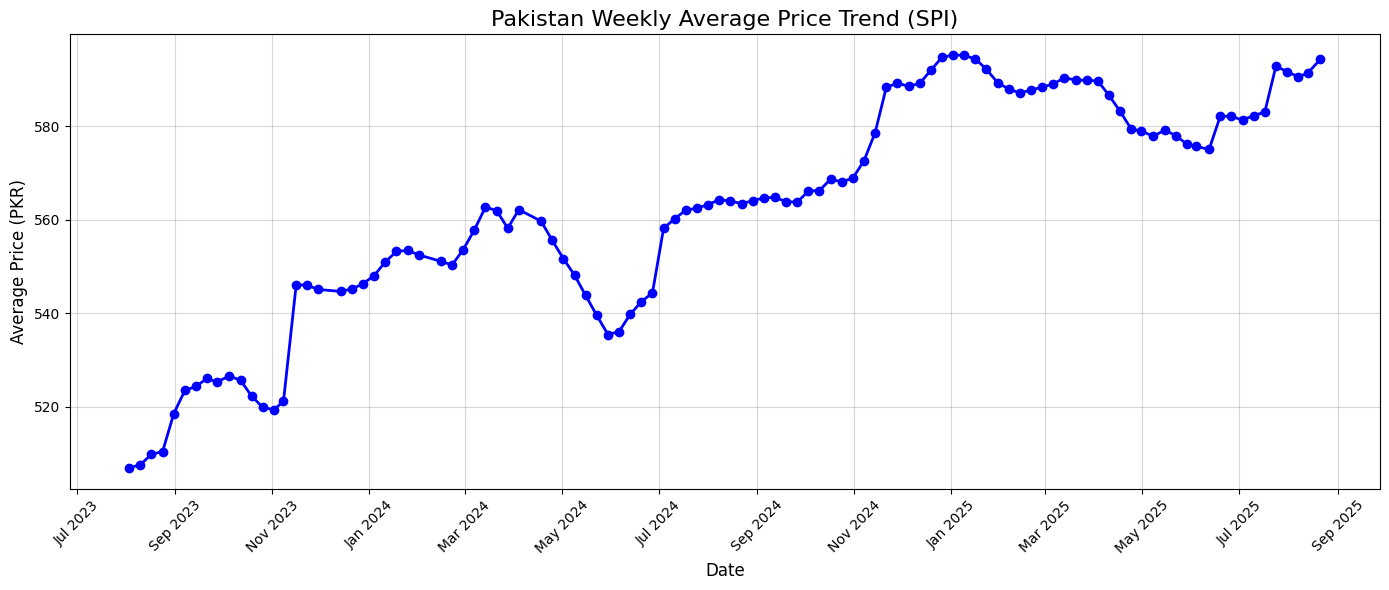

In [12]:
#lets move on to EDA
import matplotlib.dates as mdates

weekly_trend = df.groupby('Date')['Avg_Price'].mean()
# Plot improved chart
plt.figure(figsize=(14,6))
plt.plot(weekly_trend.index, weekly_trend.values, marker='o', linewidth=2, color='blue')

# Title & labels
plt.title("Pakistan Weekly Average Price Trend (SPI)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Average Price (PKR)", fontsize=12)

# Format x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # show every 2 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # format as "Jan 2025"
plt.xticks(rotation=45)

plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()


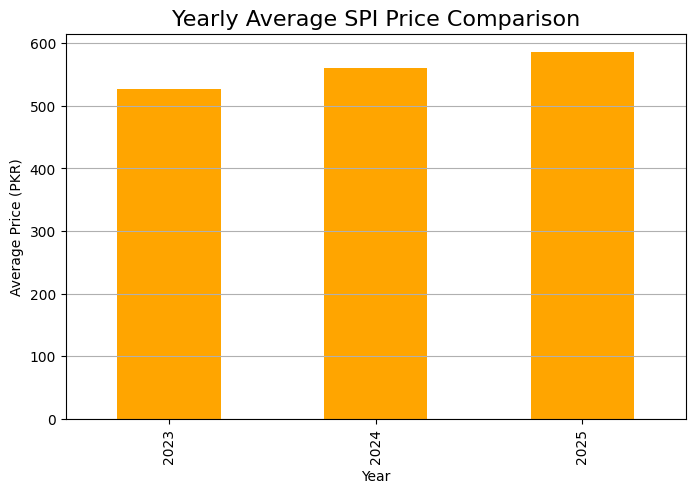

In [13]:
#Year-Over-Year  Inflations

df['Year'] = df['Date'].dt.year

#Groupby year
yearly_avg = df.groupby('Year')['Avg_Price'].mean()

plt.figure(figsize=(8,5))
yearly_avg.plot(kind='bar', color='orange')
plt.title('Yearly Average SPI Price Comparison', fontsize=16)
plt.ylabel('Average Price (PKR)')
plt.grid(axis='y')
plt.show()

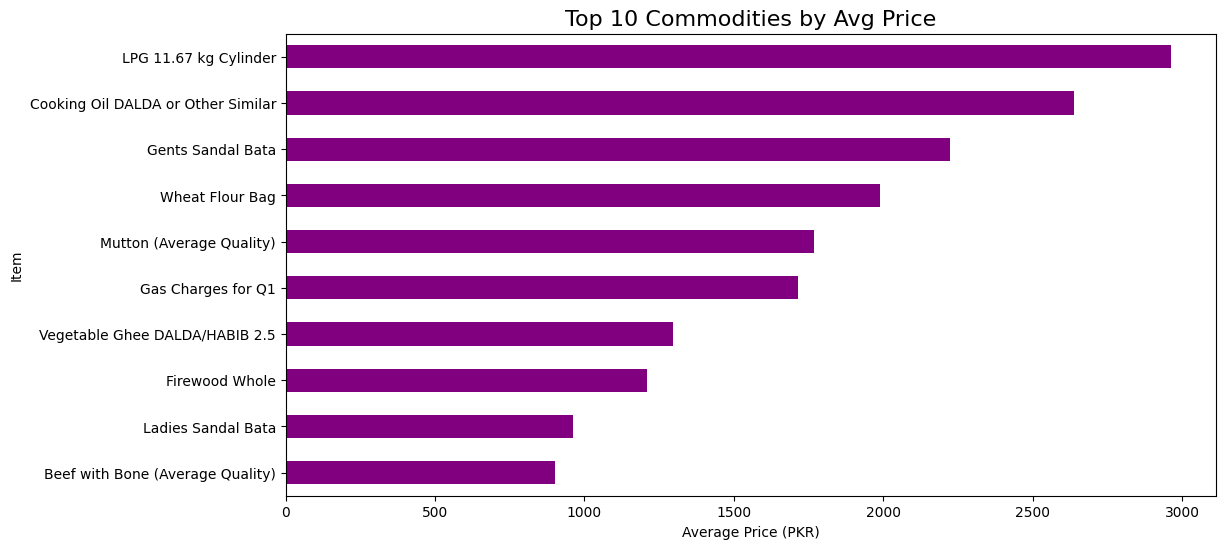

In [14]:
#Top 10 Commodities Driving Inflation

#get price change for each item

item_price_change = df.groupby('Item')['Avg_Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
item_price_change.head(10).plot(kind='barh', color= 'purple')
plt.title("Top 10 Commodities by Avg Price", fontsize=16)
plt.xlabel('Average Price (PKR)')
plt.gca().invert_yaxis()
plt.show()

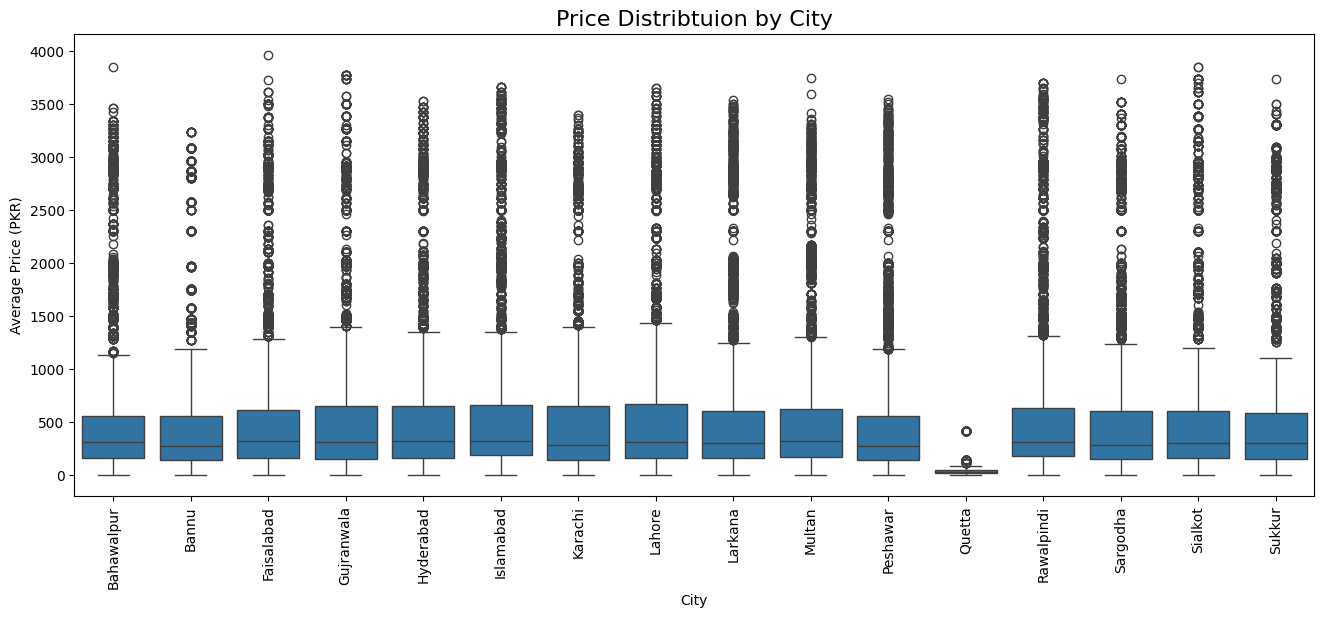

In [15]:
#City-Wise Distribtuions 
import seaborn as sns

plt.figure(figsize=(16, 6))
sns.boxplot(data=df, x='City', y='Avg_Price')
plt.title("Price Distribtuion by City", fontsize = 16)
plt.xlabel("City")
plt.ylabel("Average Price (PKR)")
plt.xticks(rotation=90)
plt.show()

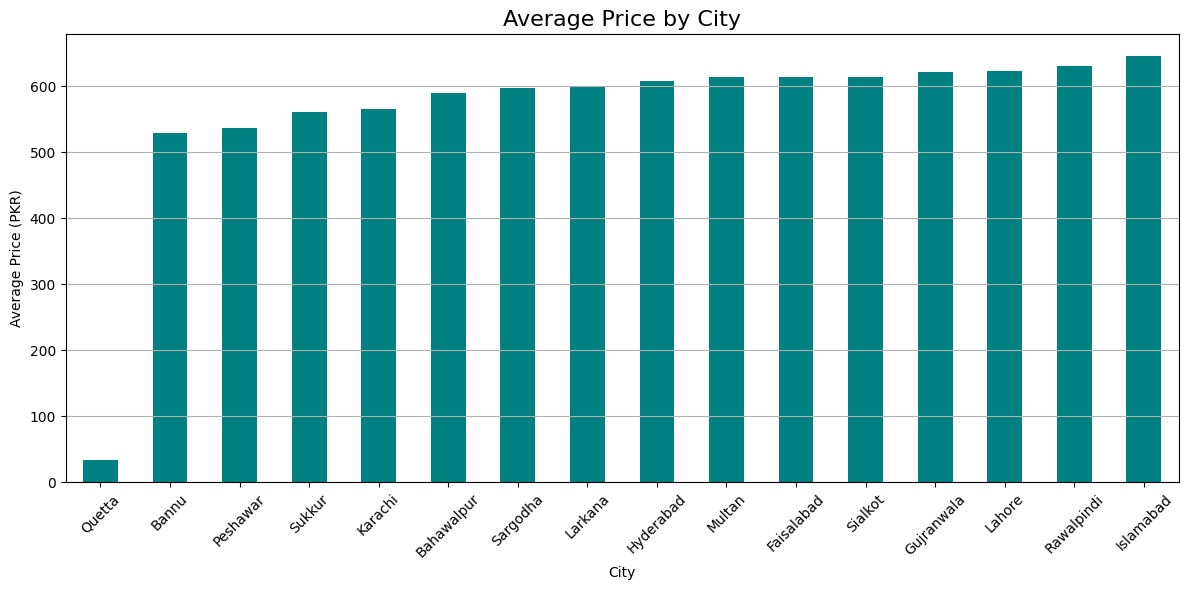

In [16]:
city_avg = df.groupby('City')['Avg_Price'].mean().sort_values()

plt.figure(figsize=(12,6))
city_avg.plot(kind='bar', color='teal')
plt.title("Average Price by City", fontsize=16)
plt.ylabel("Average Price (PKR)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


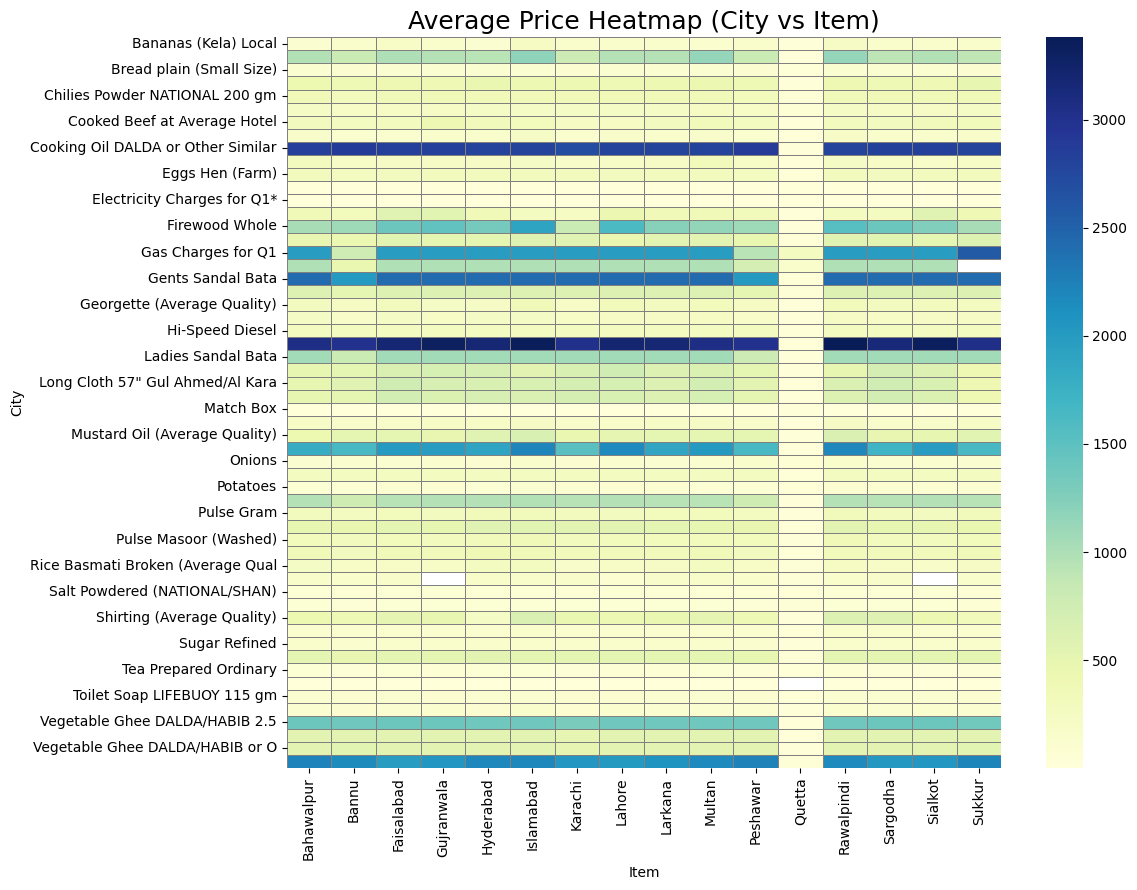

In [28]:

# Pivot table: Cities as rows, Items as columns, Avg_Price as values
heatmap_data = df.pivot_table(
    index="Item",
    columns="City",
    values="Avg_Price",
    aggfunc="mean"
)

# Plot heatmap
plt.figure(figsize=(12,9))
sns.heatmap(
    heatmap_data,
    cmap="YlGnBu",
    linewidths=0.5,
    linecolor="gray"
)
plt.title("Average Price Heatmap (City vs Item)", fontsize=18)
plt.xlabel("Item")
plt.ylabel("City")
plt.tight_layout()
plt.show()


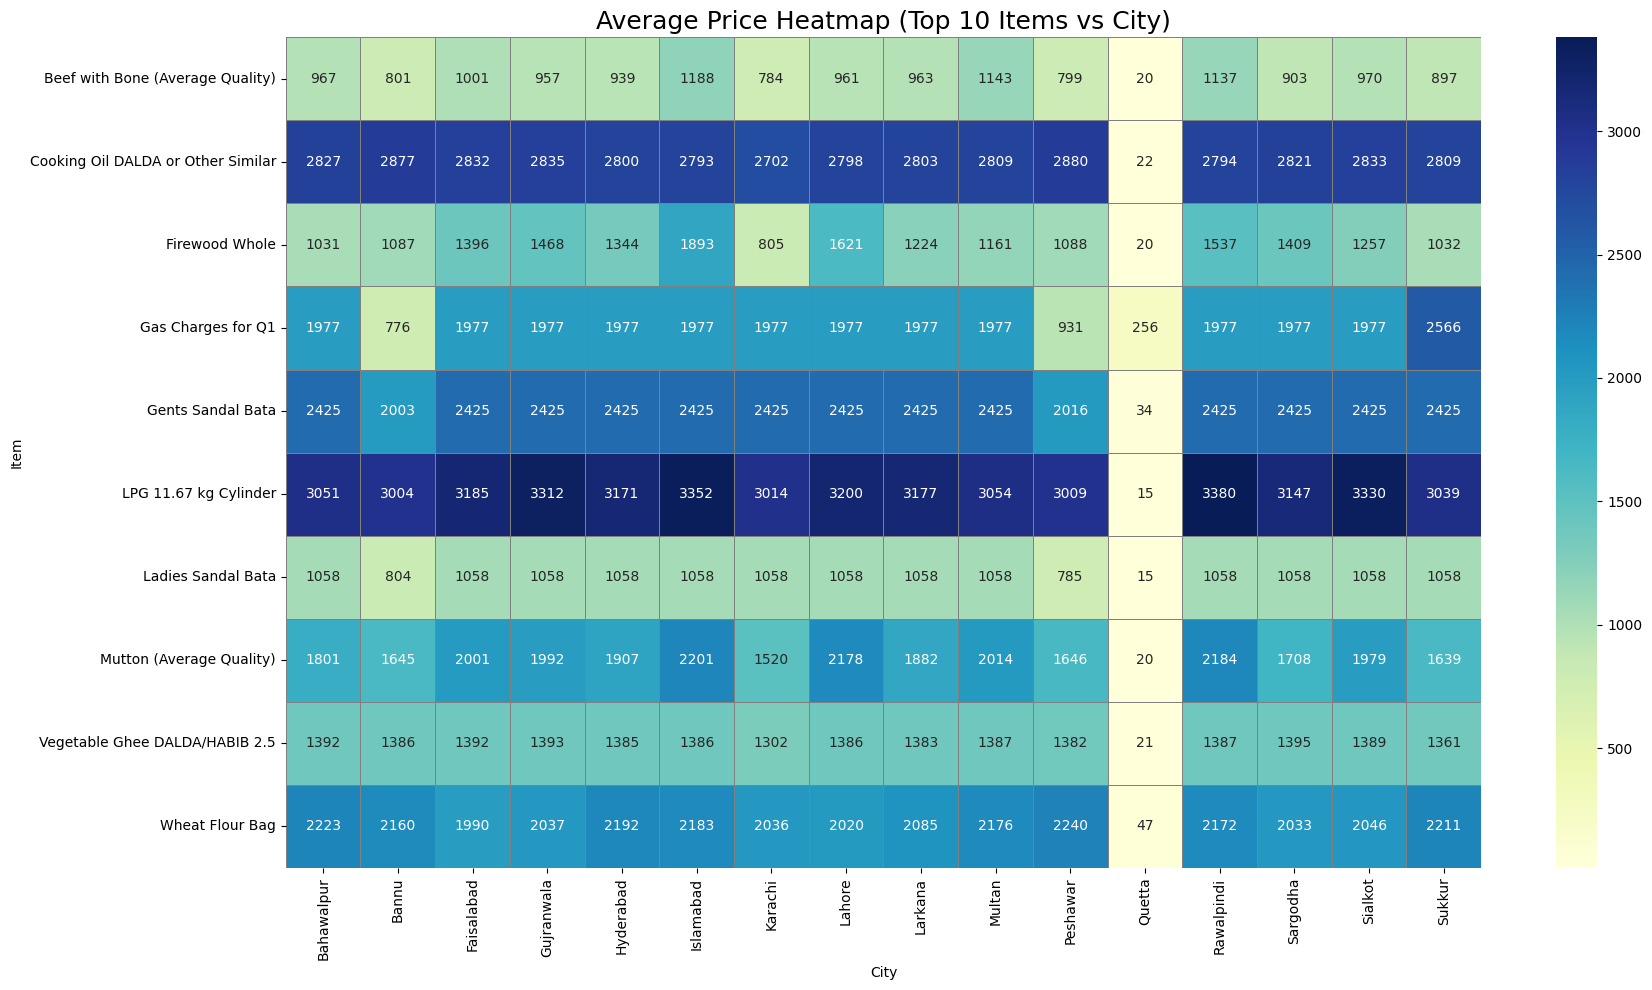

In [18]:
# Get Top 10 Items by frequency or average price (choose one)
top_items = df.groupby("Item")["Avg_Price"].mean().nlargest(10).index

# Filter dataset to Top 10 Items
filtered_data = df[df["Item"].isin(top_items)]

# Pivot table: Items (rows) vs Cities (columns)
heatmap_data = filtered_data.pivot_table(
    index="Item",
    columns="City",
    values="Avg_Price",
    aggfunc="mean"
)

# Plot heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(
    heatmap_data,
    cmap="YlGnBu",
    annot=True,
    fmt=".0f",
    linewidths=0.5,
    linecolor="gray"
)
plt.title("Average Price Heatmap (Top 10 Items vs City)", fontsize=18)
plt.xlabel("City")
plt.ylabel("Item")
plt.tight_layout()
plt.show()


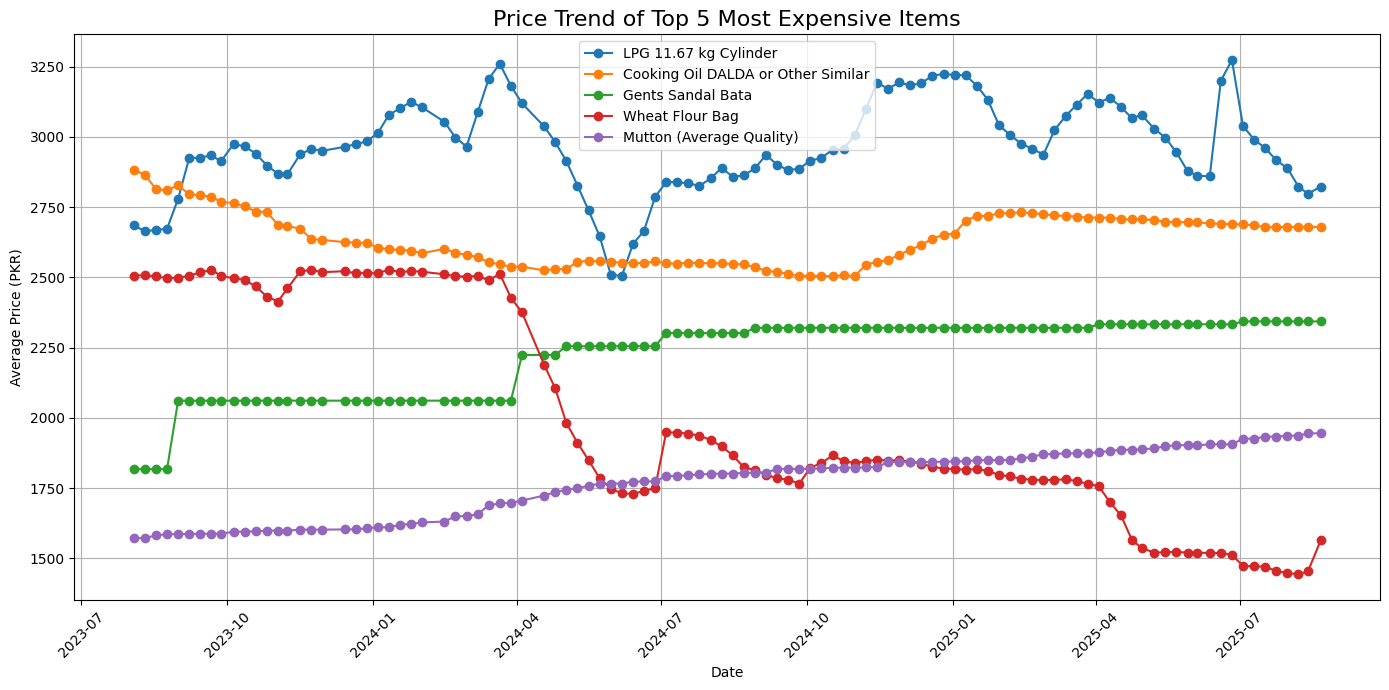

In [19]:
import matplotlib.pyplot as plt

# Get Top 5 Items by average price
top_items = df.groupby("Item")["Avg_Price"].mean().nlargest(5).index

# Filter for those items
trend_data = df[df["Item"].isin(top_items)]

# Group by Date and Item
trend_grouped = trend_data.groupby(["Date", "Item"])["Avg_Price"].mean().reset_index()

# Plot
plt.figure(figsize=(14,7))
for item in top_items:
    item_data = trend_grouped[trend_grouped["Item"] == item]
    plt.plot(item_data["Date"], item_data["Avg_Price"], marker='o', label=item)

plt.title("Price Trend of Top 5 Most Expensive Items", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Average Price (PKR)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


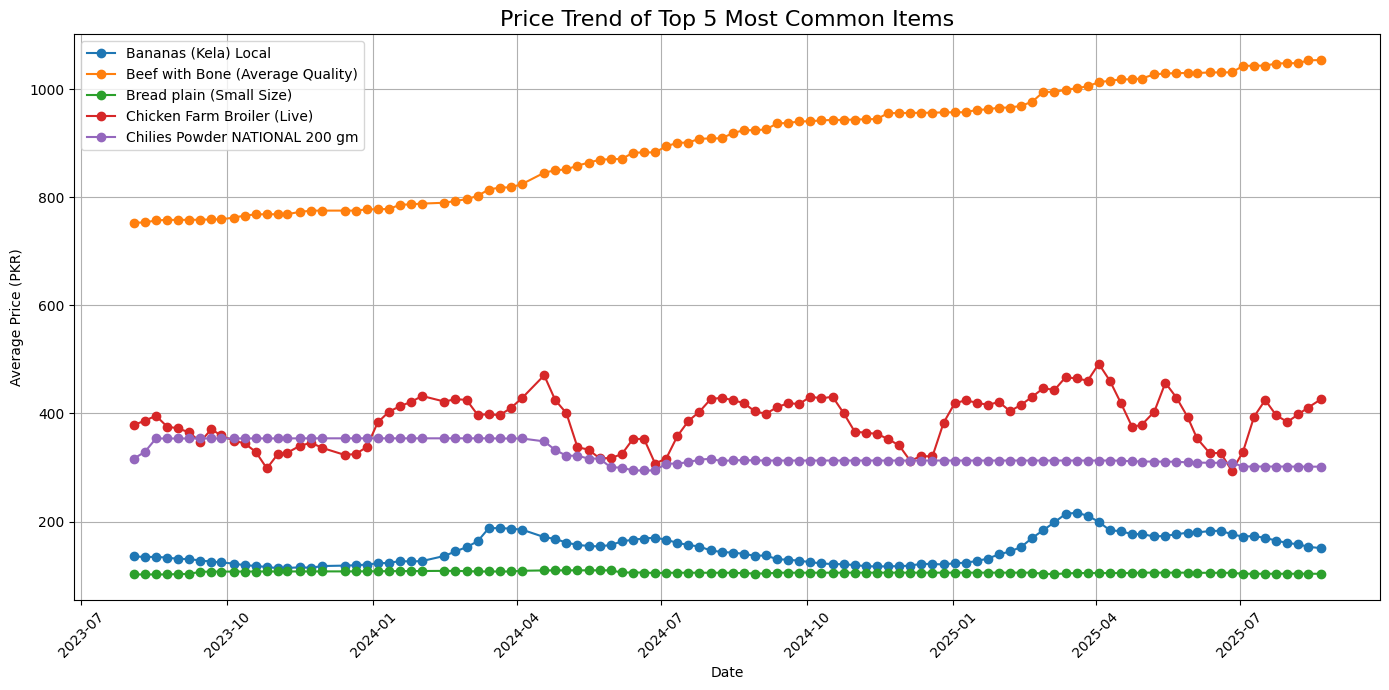

In [20]:
# Top 5 common items (most records)
top_common = df['Item'].value_counts().head(5).index

trend_com = df[df["Item"].isin(top_common)]
trend_grouped_com = trend_com.groupby(["Date", "Item"])["Avg_Price"].mean().reset_index()

plt.figure(figsize=(14,7))
for item in top_common:
    item_data = trend_grouped_com[trend_grouped_com["Item"] == item]
    plt.plot(item_data["Date"], item_data["Avg_Price"], marker='o', label=item)

plt.title("Price Trend of Top 5 Most Common Items", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Average Price (PKR)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [22]:


# Group by month for cleaner analysis
spi_monthly = df.groupby([pd.Grouper(key='Date', freq='ME'), 'Item'])['Avg_Price'].mean().reset_index()

# Sort
spi_monthly = spi_monthly.sort_values(['Item', 'Date'])

# Calculate MoM % change
spi_monthly['MoM_Change'] = spi_monthly.groupby('Item')['Avg_Price'].pct_change() * 100

# Calculate YoY % change
spi_monthly['YoY_Change'] = spi_monthly.groupby('Item')['Avg_Price'].pct_change(12) * 100

spi_monthly.head()


,Date,Item,Avg_Price,MoM_Change,YoY_Change
0,2023-08-31,Bananas (Kela) Local,133.685875,NaN,NaN
51,2023-09-30,Bananas (Kela) Local,127.105156,-4.922524,NaN
102,2023-10-31,Bananas (Kela) Local,118.667969,-6.637958,NaN
153,2023-11-30,Bananas (Kela) Local,114.999375,-3.091478,NaN
205,2023-12-31,Bananas (Kela) Local,119.189583,3.643679,NaN


C:\Users\Haris\AppData\Local\Temp\ipykernel_10952\2187357650.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='YoY_Change', y='Item', data=top_yoy, palette='Reds_r')


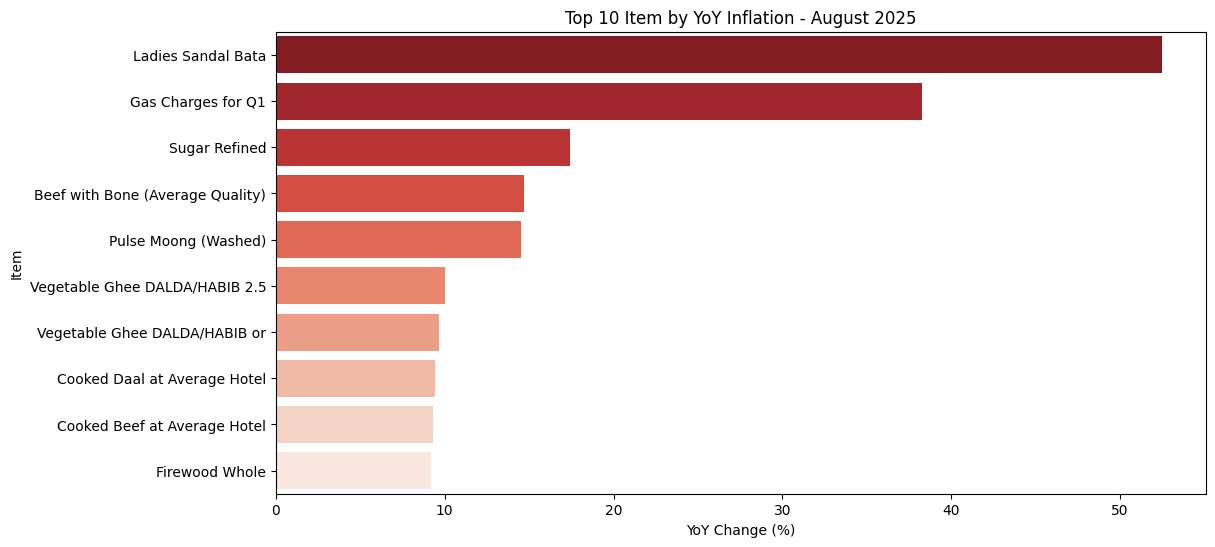

In [24]:
#Visualizing Top YoY Inflation Drivers

latest_date = spi_monthly['Date'].max()

latest_yoy = spi_monthly[spi_monthly['Date'] == latest_date].dropna(subset=['YoY_Change'])

#Top 10 inflation items

top_yoy = latest_yoy.sort_values('YoY_Change', ascending=False).head(10)

#Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='YoY_Change', y='Item', data=top_yoy, palette='Reds_r')
plt.title(f"Top 10 Item by YoY Inflation - {latest_date.strftime('%B %Y')}")
plt.xlabel("YoY Change (%)")
plt.ylabel("Item")
plt.show()

In [27]:

# 1. Latest Month in Your Dataset
latest_date = df['Date'].max()
print("📅 Latest Date in Dataset:", latest_date)

# 2. Monthly Aggregation
spi_monthly = df.groupby([pd.Grouper(key='Date', freq='ME'), 'Item'])['Avg_Price'].mean().reset_index()
spi_monthly = spi_monthly.sort_values(['Item', 'Date'])
spi_monthly['YoY_Change'] = spi_monthly.groupby('Item')['Avg_Price'].pct_change(12) * 100

# Latest YoY Inflation
latest_yoy = spi_monthly[spi_monthly['Date'] == spi_monthly['Date'].max()].dropna(subset=['YoY_Change'])
top_yoy = latest_yoy.sort_values('YoY_Change', ascending=False).head(5)
print("\n🔥 Top 5 Items by YoY Inflation:\n", top_yoy[['Item','YoY_Change']])

# 3. Most/Least Expensive Cities
city_avg = df.groupby('City')['Avg_Price'].mean().sort_values(ascending=False)
print("\n🏙️ Average Prices by City (Top 5):\n", city_avg.head())
print("\n🏙️ Cheapest Cities (Bottom 5):\n", city_avg.tail())

# 4. Most Volatile Items
volatility = df.groupby('Item')['Avg_Price'].std().sort_values(ascending=False).head(5)
print("\n📉 Most Volatile Items (Top 5):\n", volatility)

# 5. Most Stable Items
stable_items = df.groupby('Item')['Avg_Price'].std().sort_values().head(5)
print("\n📈 Most Stable Items (Top 5):\n", stable_items)


📅 Latest Date in Dataset: 2025-08-21 00:00:00

🔥 Top 5 Items by YoY Inflation:
                                   Item  YoY_Change
1259                Ladies Sandal Bata   52.470572
1252                Gas Charges for Q1   38.292047
1279                     Sugar Refined   17.434187
1238  Beef with Bone (Average Quality)   14.710771
1273              Pulse Moong (Washed)   14.514003

🏙️ Average Prices by City (Top 5):
 City
Islamabad     646.680954
Rawalpindi    630.887998
Lahore        623.058081
Gujranwala    622.650086
Sialkot       614.976570
Name: Avg_Price, dtype: float64

🏙️ Cheapest Cities (Bottom 5):
 City
Karachi     565.979419
Sukkur      561.694875
Peshawar    536.523709
Bannu       529.443223
Quetta       33.948628
Name: Avg_Price, dtype: float64

📉 Most Volatile Items (Top 5):
 Item
Gas Charges upto 3.3719 MMBTU         804.580949
LPG 11.67 kg Cylinder                 802.788578
Wheat Flour Bag                       707.178793
Cooking Oil DALDA or Other Similar    690.765

## 💡 Key Insights

1️⃣ **Luxury & Utility Costs Are Driving Inflation**  
- Ladies Sandal (Bata) prices surged 52.5% YoY, showing how even non-essential goods are heavily impacted.
- Gas Charges for Q1 rose 38.3% YoY, reflecting Pakistan’s ongoing energy crisis and its effect on household budgets.

2️⃣ **Sugar & Protein Are Getting Expensive**  
- Sugar (Refined) prices increased by 17.4% YoY, while Beef with Bone is up 14.7% YoY, showing that essentials are also becoming less affordable.
- This indicates broad-based inflation — not just luxury goods

3️⃣ **Islamabad is the Most Expensive City; Quetta Needs Investigation**  
- Islamabad’s average item price is ₨646.7, the highest in the dataset, followed by Rawalpindi and Lahore.
- Quetta shows an abnormally low average (₨33.9) — this is likely a data quality anomaly worth investigating (possible reporting/entry error).

4️⃣ **Energy Products Show Extreme Price Volatility**  
- Gas Charges (up to 3.37 MMBTU) and LPG Cylinders show volatility over ₨800, dwarfing other goods.
- Wheat Flour Bags and Cooking Oil also fluctuate heavily, underscoring their sensitivity to supply shocks.

5️⃣ **Some Items Remain Price-Stable**  
- Utilities like Telephone Call Charges and Electricity Charges barely changed, serving as stable benchmarks.
- Basic goods like Matchboxes and Salt Powder also show minimal price variance.
